# **Введение**

**Проблема**

Компания хочет автоматизировать процесс получения кредита через онлайн-заявки с помощью моделей машинного обучения. Цель - предсказать одобрение кредита в реальном времени для ускорения процесса принятия решений.

**Описание набора данных**

В этом наборе данных содержатся 13 переменных:

*   8 категориальных переменных,
*   4 непрерывных переменных и
*   1 переменная для хранения идентификатора кредита.


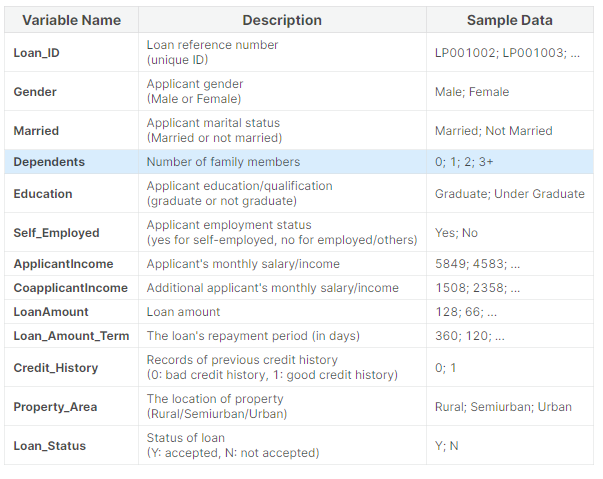

**Импорт библиотек**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

**Загузка набора данных**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving loan_dataset.csv to loan_dataset.csv


In [ ]:
df = pd.read_csv("loan_dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
print(df.shape)

(614, 13)


# **2. Провдение статистического анализа над данными**

***Категориальные переменные***

**Loan ID**

In [ ]:
df.Loan_ID.value_counts(dropna=False)

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

**Gender**


In [ ]:
df.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

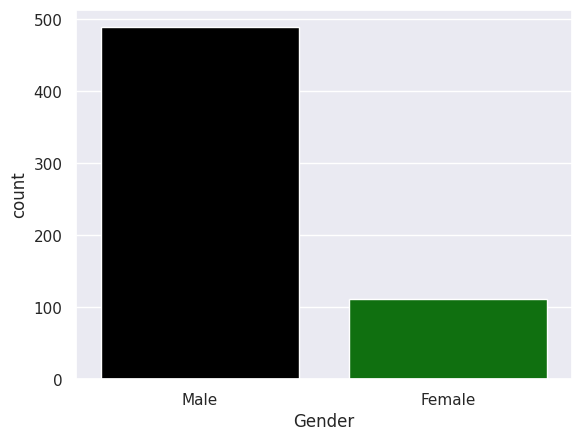

In [ ]:
sns.countplot(x="Gender", data=df, palette=["black", "green", "orange"])
plt.show()

In [ ]:
countMale = len(df[df.Gender == 'Male'])
countFemale = len(df[df.Gender == 'Female'])
countNull = len(df[df.Gender.isnull()])

print("Процент заявителей-мужчин: {:.2f}%".format((countMale / (len(df.Gender))*100)))
print("Процент заявителей-женщин:: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Процент отсутствующих значений: {:.2f}%".format((countNull / (len(df.Gender))*100)))

Процент заявителей-мужчин: 79.64%
Процент заявителей-женщин:: 18.24%
Процент отсутствующих значений: 2.12%


**Married**


In [ ]:
df.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

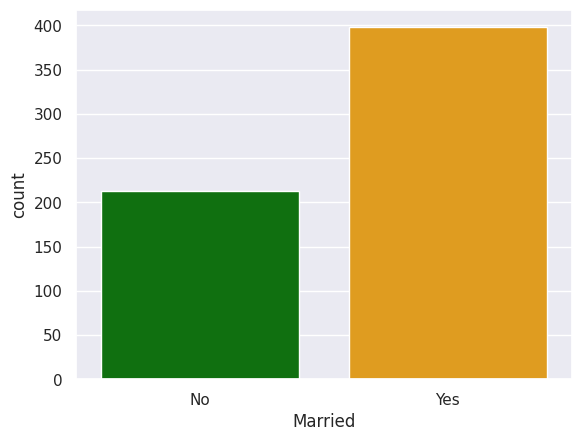

In [ ]:
sns.countplot(x="Married", data=df, palette=["green", "orange"])
plt.show()

In [ ]:
countMarried = len(df[df.Married == 'Yes'])
countNotMarried = len(df[df.Married == 'No'])
countNull = len(df[df.Married.isnull()])

print("Процент женатых: {:.2f}%".format((countMarried / (len(df.Married))*100)))
print("Процент неженатых заявителей: {:.2f}%".format((countNotMarried / (len(df.Married))*100)))
print("Процент отсутствующих значений: {:.2f}%".format((countNull / (len(df.Married))*100)))

Процент женатых: 64.82%
Процент неженатых заявителей: 34.69%
Процент отсутствующих значений: 0.49%


**Education**

In [ ]:
df.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

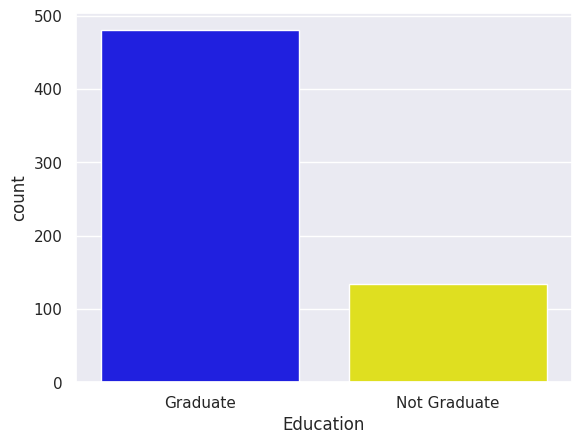

In [ ]:
sns.countplot(x="Education", data=df, palette=["blue", "yellow"])
plt.show()

In [ ]:
countGraduate = len(df[df.Education == 'Graduate'])
countNotGraduate = len(df[df.Education == 'Not Graduate'])
countNull = len(df[df.Education.isnull()])

print("Процент заявителей с образованием: {:.2f}%".format((countGraduate / (len(df.Education))*100)))
print("Процент заявителей без образовании: {:.2f}%".format((countNotGraduate / (len(df.Education))*100)))
print("Процент отсутствующих значений: {:.2f}%".format((countNull / (len(df.Education))*100)))

Процент заявителей с образованием: 78.18%
Процент заявителей без образовании: 21.82%
Процент отсутствующих значений: 0.00%


**Self Employed**

In [ ]:
df.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

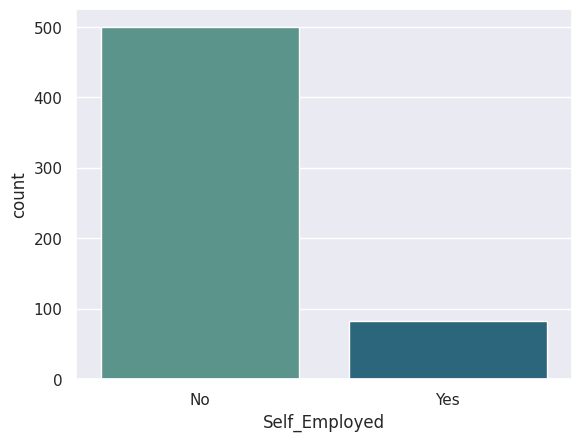

In [ ]:
sns.countplot(x="Self_Employed", data=df, palette="crest")
plt.show()

In [ ]:
countNo = len(df[df.Self_Employed == 'No'])
countYes = len(df[df.Self_Employed == 'Yes'])
countNull = len(df[df.Self_Employed.isnull()])

print("Процент не работающих на себя: {:.2f}%".format((countNo / (len(df.Self_Employed))*100)))
print("Процент работающих на себя: {:.2f}%".format((countYes / (len(df.Self_Employed))*100)))
print("Процент отсутствующих значений: {:.2f}%".format((countNull / (len(df.Self_Employed))*100)))

Процент не работающих на себя: 81.43%
Процент работающих на себя: 13.36%
Процент отсутствующих значений: 5.21%


**Credit History**

In [ ]:
df.Credit_History.value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

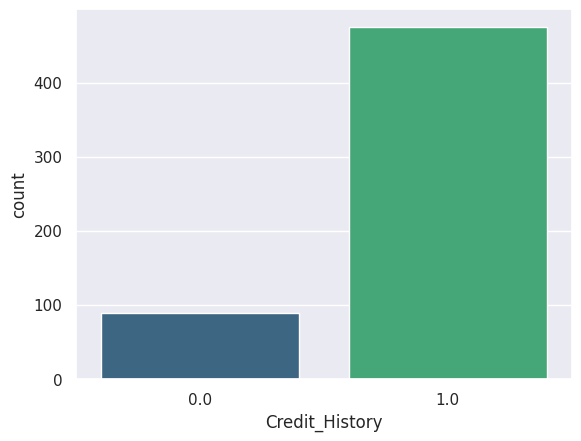

In [ ]:
sns.countplot(x="Credit_History", data=df, palette="viridis")
plt.show()

In [ ]:
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])

print("Процент хорошей кредитной истории: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Процент плохой кредитной истории: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
print("Процент отсутствующих значений: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

Процент хорошей кредитной истории: 77.36%
Процент плохой кредитной истории: 14.50%
Процент отсутствующих значений: 8.14%


**Property Area**

In [ ]:
df.Property_Area.value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

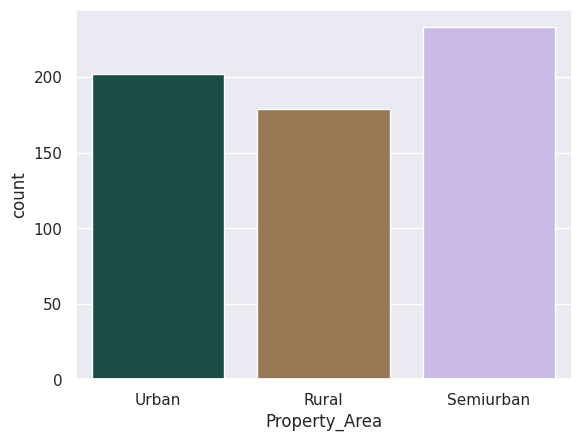

In [ ]:
sns.countplot(x="Property_Area", data=df, palette="cubehelix")
plt.show()

**Loan Status**

In [ ]:
df.Loan_Status.value_counts(dropna=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

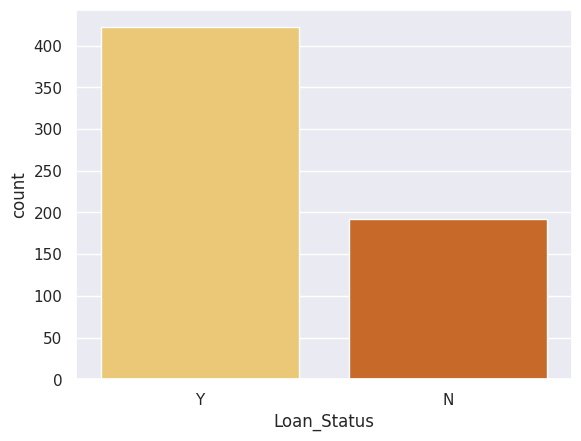

In [ ]:
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
plt.show()

**Loan Amount Term**

In [ ]:
df.Loan_Amount_Term.value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

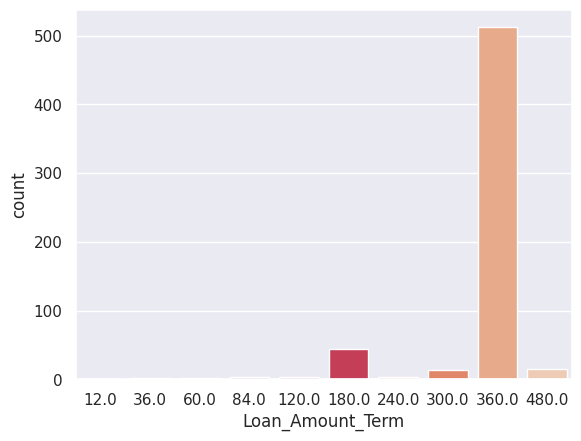

In [ ]:
sns.countplot(x="Loan_Amount_Term", data=df, palette="rocket")
plt.show()

**Числовые переменные**

In [ ]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


Распределение числовой переменной

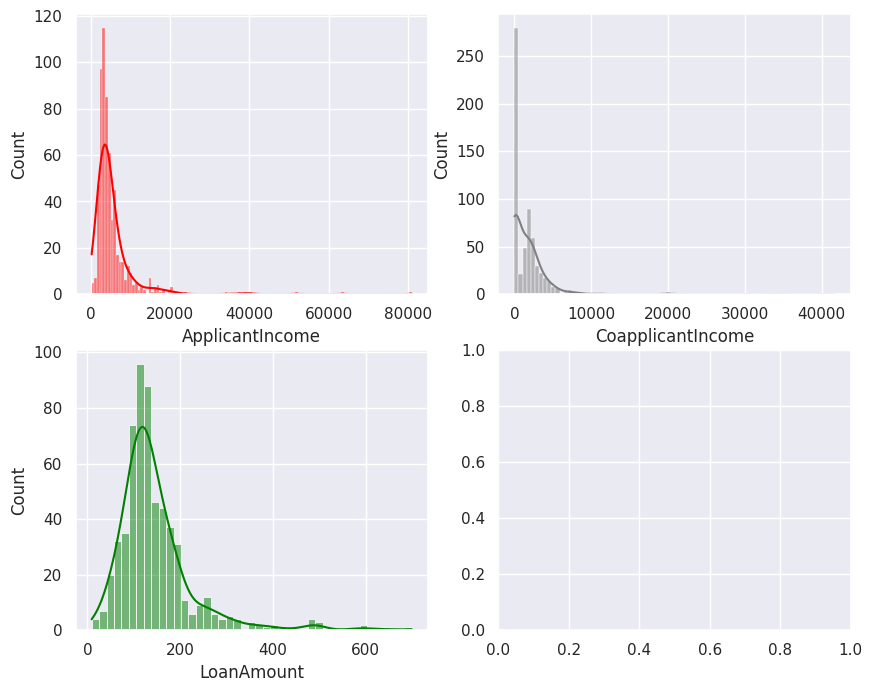

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='red')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='grey')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='green');

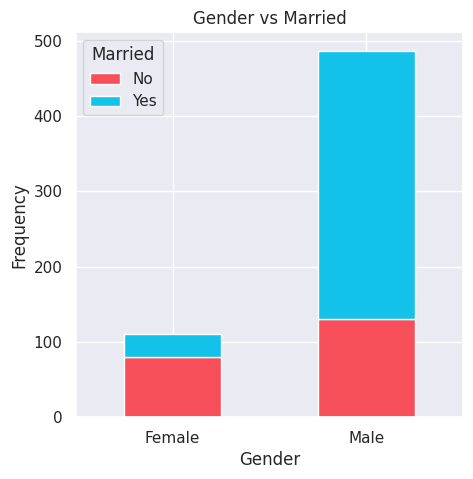

In [ ]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

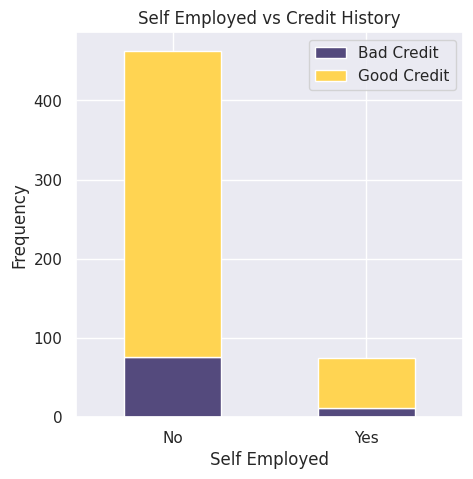

In [ ]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

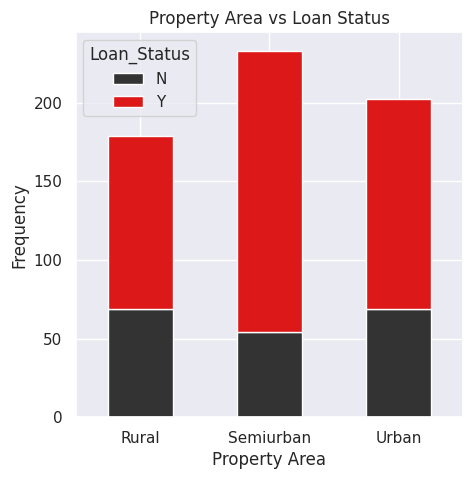

In [ ]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

**NULL Значение**

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

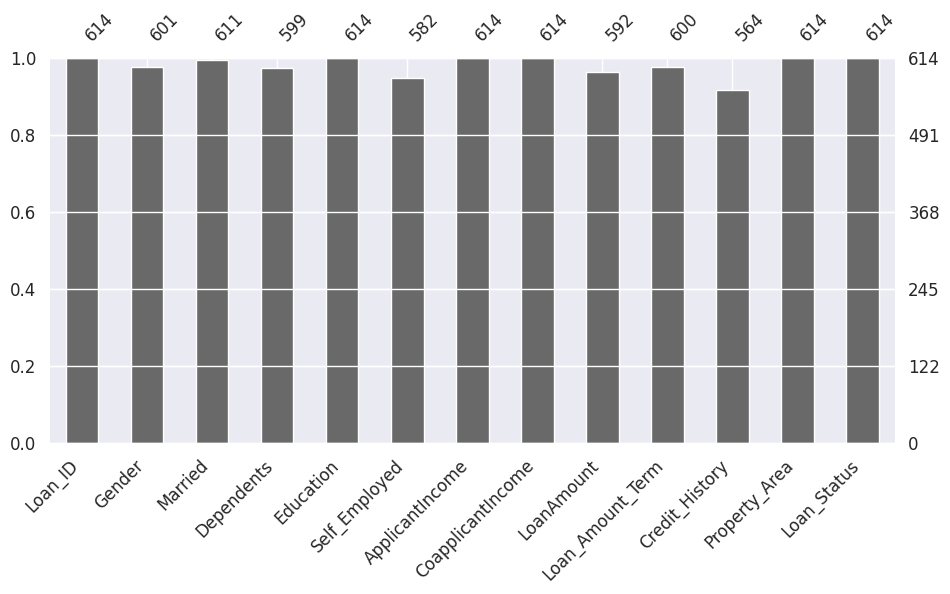

In [ ]:
plt.figure(figsize = (24, 5))
axz = plt.subplot(1,2,2)
mso.bar(df, ax = axz, fontsize = 12);

# **3. Предварительная обработка данных**

Удаление ненужных данных

In [ ]:
df = df.drop(['Loan_ID'], axis = 1)

**Вменение данных**

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [ ]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [ ]:
df = pd.get_dummies(df)

# Drop columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate',
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married',
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}

df.rename(columns=new, inplace=True)

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

В предыдущем разделе уже было показано, что распределение для ApplicantIncome, CoapplicantIncome и LoanAmount имеет положительную асимметрию.
Я буду использовать преобразование квадратного корня для нормализации распределения.

In [ ]:
# Square Root Transformation

df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

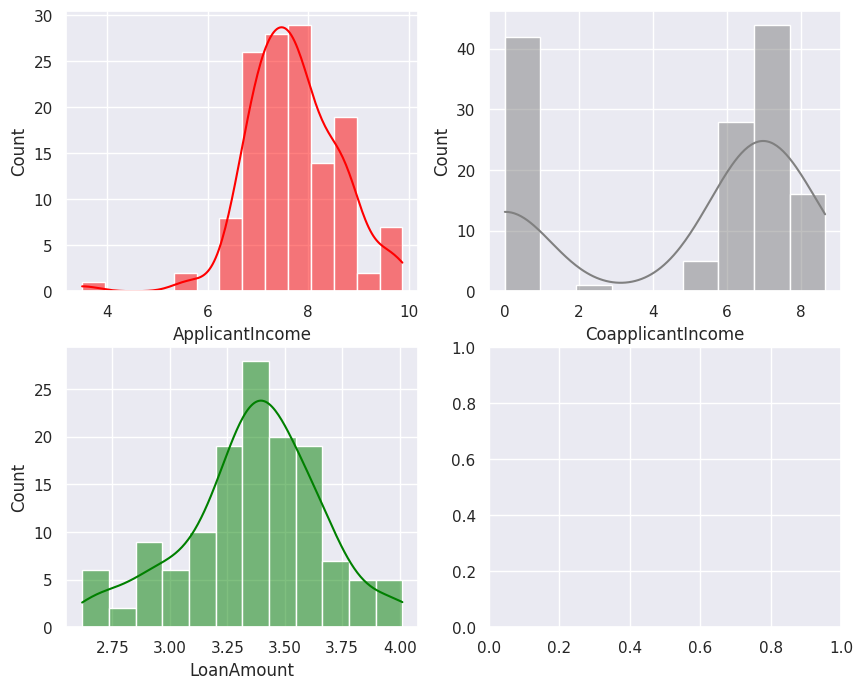

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='red')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='grey')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='green');

**Отделение признаков**

In [ ]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

In [ ]:
X, y = SMOTE().fit_resample(X, y)

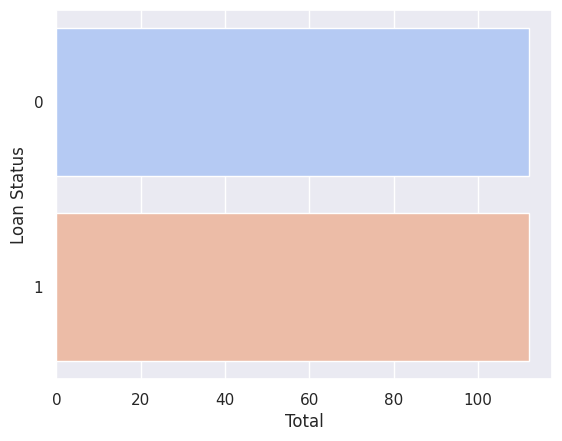

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

**Нормализация данных**

In [ ]:
X = MinMaxScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Моделы**

In [ ]:
#Logistic Regression

LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Точность Логистической регрессии: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.79      0.65      0.71        23
           1       0.69      0.82      0.75        22

    accuracy                           0.73        45
   macro avg       0.74      0.74      0.73        45
weighted avg       0.74      0.73      0.73        45

[[15  8]
 [ 4 18]]
Точность Логистической регрессии: 73.33%


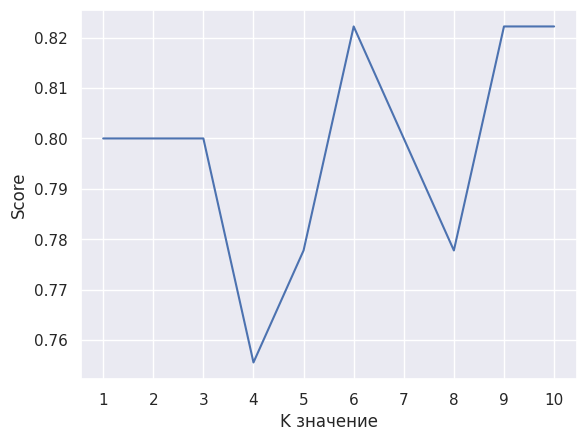

KNN высокая точность: 82.22%


In [ ]:
#K-Nearest Neighbour (KNN)

scoreListknn = []
for i in range(1,11):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))

plt.plot(range(1,11), scoreListknn)
plt.xticks(np.arange(1,11,1))
plt.xlabel("K значение")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN высокая точность: {:.2f}%".format(KNAcc*100))

In [ ]:
#Support Vector Machine (SVM)

SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC точность: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.93      0.57      0.70        23
           1       0.68      0.95      0.79        22

    accuracy                           0.76        45
   macro avg       0.80      0.76      0.75        45
weighted avg       0.81      0.76      0.75        45

[[13 10]
 [ 1 21]]
SVC точность: 75.56%


In [ ]:
# Naive Bayes

NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Categorical Naive Bayes accuracy: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

           0       0.60      0.65      0.63        23
           1       0.60      0.55      0.57        22

    accuracy                           0.60        45
   macro avg       0.60      0.60      0.60        45
weighted avg       0.60      0.60      0.60        45

[[15  8]
 [10 12]]
Categorical Naive Bayes accuracy: 60.00%


In [ ]:
#Gaussian NB

NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       0.64      0.78      0.71        23
           1       0.71      0.55      0.62        22

    accuracy                           0.67        45
   macro avg       0.67      0.66      0.66        45
weighted avg       0.67      0.67      0.66        45

[[18  5]
 [10 12]]
Gaussian Naive Bayes accuracy: 66.67%


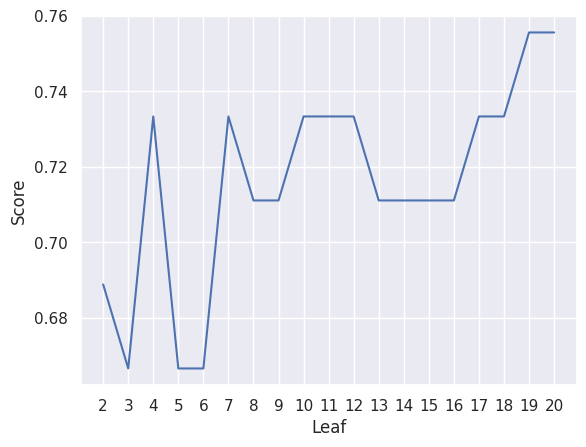

Decision Tree Accuracy: 75.56%


In [ ]:
#Decision Tree

scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))

plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

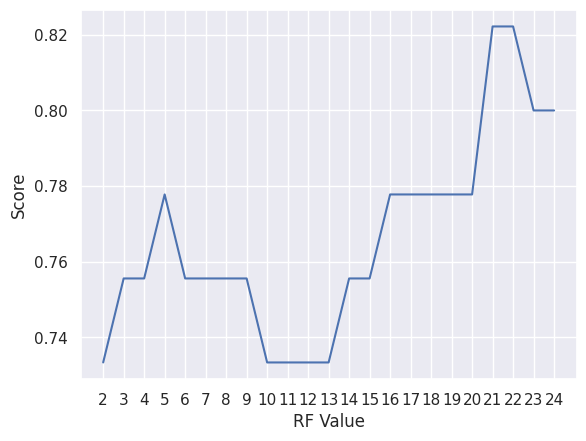

Random Forest Accuracy:  82.22%


In [ ]:
#Random Forest

scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))

plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

In [ ]:
#Gradient Boosting

paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}


In [ ]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(X_train, y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [ ]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_depth=5, max_leaf_nodes=40, n_estimators=300,
                           subsample=1)
0.7777777777777778
{'subsample': 1, 'n_estimators': 300, 'max_leaf_nodes': 40, 'max_depth': 5}
2


In [ ]:
GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        23
           1       0.81      0.77      0.79        22

    accuracy                           0.80        45
   macro avg       0.80      0.80      0.80        45
weighted avg       0.80      0.80      0.80        45

[[19  4]
 [ 5 17]]
Gradient Boosting accuracy: 80.00%


**Сравнение моделей**

In [ ]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors',
                                  'SVM', 'Categorical NB',
                                  'Gaussian NB', 'Decision Tree',
                                  'Random Forest', 'Gradient Boost'],
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100,
                                     NBAcc1*100, NBAcc2*100, DTAcc*100,
                                     RFAcc*100, GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,K Neighbors,82.222222
6,Random Forest,82.222222
7,Gradient Boost,80.000000
2,SVM,75.555556
5,Decision Tree,75.555556
0,Logistic Regression,73.333333
4,Gaussian NB,66.666667
3,Categorical NB,60.000000
